In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_palette("winter")
sns.set_style("darkgrid")

In [3]:
import re
import io

In [4]:
with open("BioGroProds.csv", 'r') as f:
    data = f.read()

df = pd.read_csv(io.StringIO(re.sub('"\s*\n','"',data)), delimiter=";")

for col in df.columns:
    if df[col].dtype == np.object_:
        df[col] = df[col].str.replace('\n',',')

In [5]:
df.head()

,BioGro No,Licensee Name,Address,Input Name,Sub Type,Category,Expiry Date
0,5441,FSP Australia,"Octal Street,20,Brisbane, Yatala 4207",“Reggie Post” Innovative Intermediate Trellis ...,Farm Management,Crop Husbandry / Orchard Management,31.07.2023
1,2933,PGG Wrightson (Fruitfed Supplies),"Westwood Avenue,20,Blenheim, Springlands",µInoculate PP9,Soil & Plant Nutrition,Microorganisms,31.07.2023
2,4436,Biostart Ltd,"Anzac Street,33A,Auckland, Takapuna 0622",µInoculate PP9,Soil & Plant Nutrition,Microorganisms,31.07.2023
3,4472,Farmlands Co-Operative Society Ltd,"Ruahapia Rd,233,Hastings, Farmlands Whakatu 4172",µInoculate PP9 (SKU# 158042),Soil & Plant Nutrition,Microorganisms,31.07.2023
4,2753,BdMax Ltd,"Tauroa Road,32,Havelock North 4130",2573 - Bird Scare,Crop Management,Homeopathic Preparation,31.07.2023


Count and Unique values

In [6]:
df.count()

BioGro No        1000
Licensee Name    1000
Address          1000
Input Name       1000
Sub Type         1000
Category          885
Expiry Date      1000
dtype: int64

In [7]:
len(df["Licensee Name"].unique())

121

In [8]:
len(df["Category"].unique())

37

In [9]:
# Crops, Lifestock, soil & plant
df["Sub Type"].value_counts()

Sub Type
Soil & Plant Nutrition         465
Crop Management                216
Livestock Treatment            128
Livestock Feed / Supplement     87
Facility Management             54
Seeds and Planting Stock        45
Farm Management                  3
Apiary Management                2
Name: count, dtype: int64

In [10]:
# Some companies have had their licenses expired. Majority nearing the expiry
df["Expiry Date"].value_counts()

Expiry Date
31.07.2023    939
30.09.2023     45
31.07.2024      5
31.03.2023      4
30.11.2023      2
30.06.2023      2
31.08.2023      1
31.12.2023      1
23.12.2023      1
Name: count, dtype: int64

In [11]:
# Only one company ending on the 23rd vs end of the month
df[df["Expiry Date"] == "23.12.2023"]

,BioGro No,Licensee Name,Address,Input Name,Sub Type,Category,Expiry Date
727,6185,Arxada NZ Ltd,"Hudson Road,13-15,New Plymouth 4312",Esteem,Crop Management,Pesticide,23.12.2023


In [12]:
top10 = df["Licensee Name"].value_counts().sort_values(ascending=False).head(10)
top10
# Homeopathic Farm Services is the biggest player in the game

Licensee Name
Homeopathic Farm Services Ltd         109
Farmlands Co-Operative Society Ltd     80
PGG Wrightson (Fruitfed Supplies)      72
Horticentre Ltd                        56
Kings Seeds NZ Ltd                     45
Rorisons RMD Ltd                       36
Kiwi Fertiliser Co Ltd                 27
Agrifert (NZ) Limited                  22
IXOM Operations Pty Ltd                21
Fertco 2016 Ltd                        20
Name: count, dtype: int64

In [13]:
top10.reset_index()

,Licensee Name,count
0,Homeopathic Farm Services Ltd,109
1,Farmlands Co-Operative Society Ltd,80
2,PGG Wrightson (Fruitfed Supplies),72
3,Horticentre Ltd,56
4,Kings Seeds NZ Ltd,45
5,Rorisons RMD Ltd,36
6,Kiwi Fertiliser Co Ltd,27
7,Agrifert (NZ) Limited,22
8,IXOM Operations Pty Ltd,21
9,Fertco 2016 Ltd,20


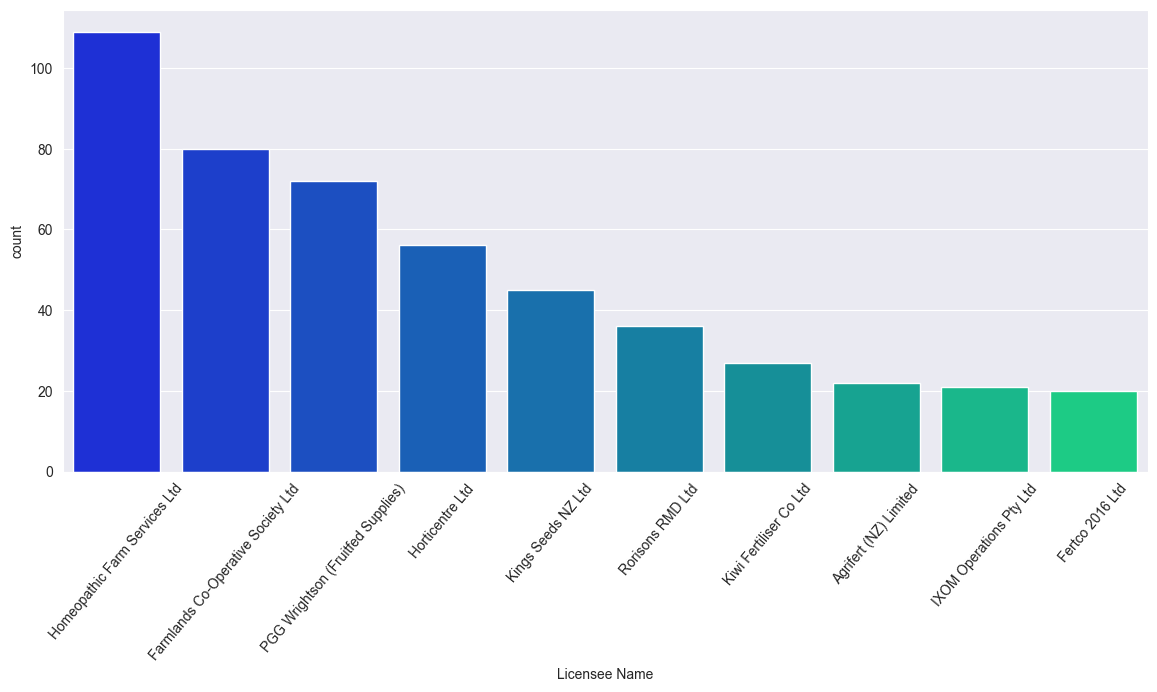

In [14]:
plt.figure(figsize=(14, 6))

sns.barplot(data=top10.reset_index(), x="Licensee Name", y="count", palette="winter")

plt.xticks(rotation=50)
plt.show()

In [22]:
grouped_input_company = df.groupby(["Input Name", "Licensee Name"]).count()
grouped_input_company[grouped_input_company["BioGro No"] > 1]

BioGro No  Address   
Input Name                  Licensee Name                                
Aerolime (Aerial Lime)      Graymont (NZ) Ltd               2        2  \
Ag Drier                    Graymont (NZ) Ltd               2        2   
Ag Lime                     Fertilizer NZ Ltd               2        2   
                            Kiwi Fertiliser Co Ltd          2        2   
Ag Lime (Agricultural Lime) Graymont (NZ) Ltd               3        3   
...                                                       ...      ...   
Humate 26%                  Rorisons RMD Ltd                3        3   
Humate S100                 Rorisons RMD Ltd                3        3   
Hydroboracite               Agvance Nutrition Ltd           2        2   
Hydroboracite Boron         Kiwi Fertiliser Co Ltd          3        3   
Iodocow                     Agvance Nutrition Ltd           2        2   

                                                    Sub Type  Category   
Input Name                  Licensee Name                                
Aerolime (Aerial Lime)      Graymont (NZ) Ltd              2         2  \
Ag Drier                    Graymont (NZ) Ltd              2         2   
Ag Lime                     Fertilizer NZ Ltd              2         2   
                            Kiwi Fertiliser Co Ltd         2         2   
Ag Lime (Agricultural Lime) Graymont (NZ) Ltd              3         3   
...                                                      ...       ...   
Humate 26%                  Rorisons RMD Ltd               3         3   
Humate S100                 Rorisons RMD Ltd               3         3   
Hydroboracite               Agvance Nutrition Ltd          2         0   
Hydroboracite Boron         Kiwi Fertiliser Co Ltd         3         3   
Iodocow                     Agvance Nutrition Ltd          2         0   

                                                    Expiry Date  
Input Name                  Licensee Name                        
Aerolime (Aerial Lime)      Graymont (NZ) Ltd                 2  
Ag Drier                    Graymont (NZ) Ltd                 2  
Ag Lime                     Fertilizer NZ Ltd                 2  
                            Kiwi Fertiliser Co Ltd            2  
Ag Lime (Agricultural Lime) Graymont (NZ) Ltd                 3  
...                                                         ...  
Humate 26%                  Rorisons RMD Ltd                  3  
Humate S100                 Rorisons RMD Ltd                  3  
Hydroboracite               Agvance Nutrition Ltd             2  
Hydroboracite Boron         Kiwi Fertiliser Co Ltd            3  
Iodocow                     Agvance Nutrition Ltd             2  

[64 rows x 5 columns]

In [23]:
df[df["Licensee Name"] == "Graymont (NZ) Ltd"]

,BioGro No,Licensee Name,Address,Input Name,Sub Type,Category,Expiry Date
36,4928,Graymont (NZ) Ltd,"Limekiln Road,Dunback, Makareao 9483",Aerolime (Aerial Lime),Soil & Plant Nutrition,Mineral Fertiliser,31.07.2023
37,4928,Graymont (NZ) Ltd,"Limekiln Road,Dunback, Makareao 9483",Aerolime (Aerial Lime),Livestock Feed / Supplement,Supplement,31.07.2023
40,4928,Graymont (NZ) Ltd,"Limekiln Road,Dunback, Makareao 9483",Ag Drier,Soil & Plant Nutrition,Mineral Fertiliser,31.07.2023
41,4928,Graymont (NZ) Ltd,"Limekiln Road,Dunback, Makareao 9483",Ag Drier,Livestock Feed / Supplement,Supplement,31.07.2023
49,4928,Graymont (NZ) Ltd,"Limekiln Road,Dunback, Makareao 9483",Ag Lime (Agricultural Lime),Soil & Plant Nutrition,Mineral Fertiliser,31.07.2023
50,4928,Graymont (NZ) Ltd,"Limekiln Road,Dunback, Makareao 9483",Ag Lime (Agricultural Lime),Soil & Plant Nutrition,Mineral Fertiliser,31.07.2023
51,4928,Graymont (NZ) Ltd,"Limekiln Road,Dunback, Makareao 9483",Ag Lime (Agricultural Lime),Livestock Feed / Supplement,Supplement,31.07.2023
368,4928,Graymont (NZ) Ltd,"Limekiln Road,Dunback, Makareao 9483",Calcimate,Livestock Feed / Supplement,Supplement,31.07.2023
369,4928,Graymont (NZ) Ltd,"Limekiln Road,Dunback, Makareao 9483",Calcimate,Soil & Plant Nutrition,NaN,31.07.2023
370,4928,Graymont (NZ) Ltd,"Limekiln Road,Dunback, Makareao 9483",Calcimate,Soil & Plant Nutrition,Mineral Fertiliser,31.07.2023


Verifying Inputs.CSV

In [25]:
inputCSV = pd.read_csv("inputs.csv")
inputCSV.head()

,Input . sort ascending,BioGro #. sort descending,Licensee. sort descending,Type. sort descending,Category. sort descending,Sub Type. sort descending
0,“Reggie Post” Innovative Intermediate Trellis ...,5441,FSP Australia,Farm Management,Crop Husbandry / Orchard Management,NaN
1,µInoculate PP9,2933,PGG Wrightson (Fruitfed Supplies),Soil & Plant Nutrition,Microorganisms,Inoculant
2,µInoculate PP9,4436,Biostart Ltd,Soil & Plant Nutrition,Microorganisms,Inoculant
3,µInoculate PP9 (SKU# 158042),4472,Farmlands Co-Operative Society Ltd,Soil & Plant Nutrition,Microorganisms,NaN
4,1Step VP41,5596,Lallemand Australia Pty Ltd,Yeast Nutrient,NaN,NaN


In [26]:
inputCSV.count()

Input . sort ascending       75
BioGro #. sort descending    75
Licensee. sort descending    75
Type. sort descending        75
Category. sort descending    63
Sub Type. sort descending     9
dtype: int64

In [27]:
inputCSV.tail(20)

,Input . sort ascending,BioGro #. sort descending,Licensee. sort descending,Type. sort descending,Category. sort descending,Sub Type. sort descending
55,Ag Lime,5082,Fertco 2016 Ltd,Soil & Plant Nutrition,Mineral Fertiliser,NaN
56,Ag Lime,4974,Kiwi Fertiliser Co Ltd,Soil & Plant Nutrition,Mineral Fertiliser,NaN
57,Ag Lime,4974,Kiwi Fertiliser Co Ltd,Soil & Plant Nutrition,Mineral Fertiliser,NaN
58,Ag Lime,4862,Fertilizer NZ Ltd,Soil & Plant Nutrition,Mineral Fertiliser,NaN
59,Ag Lime,4862,Fertilizer NZ Ltd,Soil & Plant Nutrition,Mineral Fertiliser,NaN
60,Ag Lime (Agricultural Lime),4928,Graymont (NZ) Ltd,Soil & Plant Nutrition,Mineral Fertiliser,NaN
61,Ag Lime (Agricultural Lime),4928,Graymont (NZ) Ltd,Soil & Plant Nutrition,Mineral Fertiliser,NaN
62,Ag Lime (Agricultural Lime),4928,Graymont (NZ) Ltd,Livestock Feed / Supplement,Supplement,Mineral
63,Ag Lime (SKU# 1015198),4472,Farmlands Co-Operative Society Ltd,Soil & Plant Nutrition,Mineral Fertiliser,NaN
64,Ag Salt,4841,Osflo Fertiliser Ltd,Soil & Plant Nutrition,Salt,NaN
